<a href="https://colab.research.google.com/github/berryboom/dap-2024/blob/main/les07/rep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №7. Классификация

Выполните следующие задания:

1. Откройте в файл в Google Colab (используйте собственный форк репозитория).
2. Решите задачи.
3. Сохраните результат в виде файла rep.ipynb в ваш репозиторий github в директорию ./les07
4. Создайте pull request в репозиторий https://github.com/chebotarevsa/dap-2024. Название pull request должно иметь формат "<Номер лабораторной работы>  <Номер группы> <ФИО>"
5. Сдайте работу в системе "Пегас", в отчет укажите ссылку на pull request

Используя набор данных titanic.csv постройте модель предсказывающую выжил или погиб пассажир.
1.	PassengerId – Идентификатор пассажира (уникальный номер для каждого пассажира).
2.	Survived – Выжил (0 – не выжил, 1 – выжил).
3.	Pclass – Класс пассажира (1 – первый класс, 2 – второй класс, 3 – третий класс).
4.	Name – Имя (полное имя пассажира).
5.	Sex – Пол (male – мужчина, female – женщина).
6.	Age – Возраст (числовое значение, может быть дробным).
7.	SibSp – Количество родственников на борту (братьев, сестер или супругов).
8.	Parch – Количество родителей или детей на борту.
9.	Ticket – Номер билета.
10.	Fare – Стоимость билета (в фунтах стерлингов).
11.	Cabin – Номер каюты (может быть пропущен, если данные отсутствуют).
12.	Embarked – Порт посадки (C – Cherbourg, Q – Queenstown, S – Southampton).

In [ ]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")

## Извлечение данных

1. Создайте DataFarame из файла titanic.csv, в качестве индекса используйте столбец "PassengerId".

In [ ]:
import pandas as pd

# Загрузка данных из файла titanic.csv
data = pd.read_csv('titanic.csv', index_col='PassengerId')

# Вывод первых 5 строк DataFrame
print(data.head())



             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S

2. Выведете первые 7 строк набора.

In [ ]:
import pandas as pd
data = pd.read_csv('titanic.csv', index_col='PassengerId')
print(data.head(7))


             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
6                   0       3   
7                   0       1   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   
6                                             Moran, Mr. James    male   NaN   
7                                      McCarthy, Mr. Timothy J

### Подготовка данных

3. Выведете информацию о типах данных в наборе. Имеются ли в наборе не числовые признаки? Имеются ли в наборе данные имеющие значение null?
    

In [ ]:
import pandas as pd
data = pd.read_csv('titanic.csv', index_col='PassengerId')

# Вывод информации о типах данных
print("Информация о типах данных:")
print(data.info())

# Проверка наличия не числовых признаков
non_numeric_columns = data.select_dtypes(exclude=['number']).columns
print("\nНе числовые признаки:")
print(non_numeric_columns)

# Проверка наличия значений null
null_values = data.isnull().sum()
print("\nКоличество значений null в каждом столбце:")
print(null_values[null_values > 0])

Информация о типах данных:
<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None

Не числовые признаки:
Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

Количество значений null в каждом столбце:
Age         177
Cabin       687
Embarked      2
dtype: int64


4. Удалите не числовые признаки, которые по вашему мнению, не могут влиять на заначение выжил или погиб пассажир.

In [ ]:
import pandas as pd
data = pd.read_csv('titanic.csv', index_col='PassengerId')

# Удаление не числовых признаков, которые не могут влиять на выживание
data_cleaned = data.drop(columns=['Name', 'Ticket', 'Cabin'])

# Вывод первых 7 строк очищенного DataFrame
print(data_cleaned.head(7))

             Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
PassengerId                                                                
1                   0       3    male  22.0      1      0   7.2500        S
2                   1       1  female  38.0      1      0  71.2833        C
3                   1       3  female  26.0      0      0   7.9250        S
4                   1       1  female  35.0      1      0  53.1000        S
5                   0       3    male  35.0      0      0   8.0500        S
6                   0       3    male   NaN      0      0   8.4583        Q
7                   0       1    male  54.0      0      0  51.8625        S


5. Вместо признака "Sex" (я надеюсь вы его не удалили 😂) Создайте два новых признака male и female которые содержат значения 0 или 1.

In [ ]:
import pandas as pd
data = pd.read_csv('titanic.csv', index_col='PassengerId')

# Создание новых признаков male и female
data['male'] = data['Sex'].map({'male': 1, 'female': 0})
data['female'] = data['Sex'].map({'male': 0, 'female': 1})

# Вывод первых 7 строк обновленного DataFrame
print(data.head(7))

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
6                   0       3   
7                   0       1   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   
6                                             Moran, Mr. James    male   NaN   
7                                      McCarthy, Mr. Timothy J

6. Удалите строки, которые содержать хотя бы одно null значение.

In [ ]:
import pandas as pd

data = pd.read_csv('titanic.csv', index_col='PassengerId')

# Удаление строк с хотя бы одним null значением
data_cleaned = data.dropna()

# Вывод первых 7 строк очищенного DataFrame
print(data_cleaned.head(7))

             Survived  Pclass  \
PassengerId                     
2                   1       1   
4                   1       1   
7                   0       1   
11                  1       3   
12                  1       1   
22                  1       2   
24                  1       1   

                                                          Name     Sex   Age  \
PassengerId                                                                    
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
7                                      McCarthy, Mr. Timothy J    male  54.0   
11                             Sandstrom, Miss. Marguerite Rut  female   4.0   
12                                    Bonnell, Miss. Elizabeth  female  58.0   
22                                       Beesley, Mr. Lawrence    male  34.0   
24                                Sloper, Mr. William Thompson

## Исследование данных

4. Нормализуйте значения признака "Fare".

In [ ]:
import pandas as pd
data = pd.read_csv('titanic.csv', index_col='PassengerId')

# Нормализация значений признака 'Fare' с использованием Min-Max нормализации
data['Fare_normalized'] = (data['Fare'] - data['Fare'].min()) / (data['Fare'].max() - data['Fare'].min())

# Вывод первых 7 строк обновленного DataFrame
print(data[['Fare', 'Fare_normalized']].head(7))


                Fare  Fare_normalized
PassengerId                          
1             7.2500         0.014151
2            71.2833         0.139136
3             7.9250         0.015469
4            53.1000         0.103644
5             8.0500         0.015713
6             8.4583         0.016510
7            51.8625         0.101229


5. Найдите разницу между средними значениями признака "Fare" для погибших и выживших пассажиров.

In [ ]:
import pandas as pd
data = pd.read_csv('titanic.csv', index_col='PassengerId')

# Группировка данных по признаку 'Survived' и вычисление средних значений 'Fare'
mean_fare = data.groupby('Survived')['Fare'].mean()

# Вычисление разницы между средними значениями
difference = mean_fare[1] - mean_fare[0]

# Вывод результатов
print(f"Среднее значение 'Fare' для выживших: {mean_fare[1]}")
print(f"Среднее значение 'Fare' для погибших: {mean_fare[0]}")
print(f"Разница между средними значениями 'Fare': {difference}")

Среднее значение 'Fare' для выживших: 48.39540760233918
Среднее значение 'Fare' для погибших: 22.117886885245902
Разница между средними значениями 'Fare': 26.27752071709328


6. Простройте на одной оси координат гистограмы значений признака "Fare" для погибших и выживших пассажиров.

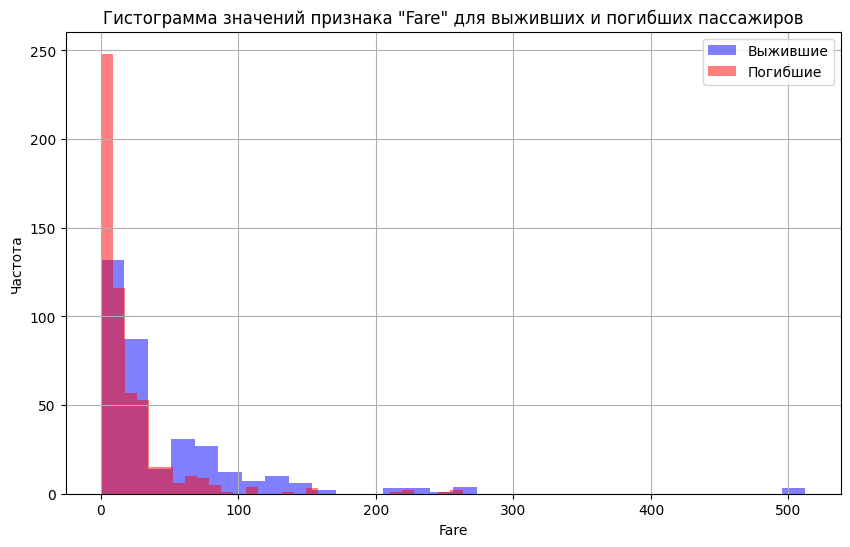

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('titanic.csv', index_col='PassengerId')

# Создание гистограммы
plt.figure(figsize=(10, 6))

# Гистограмма для выживших (Survived = 1)
plt.hist(data[data['Survived'] == 1]['Fare'], bins=30, alpha=0.5, label='Выжившие', color='blue')

# Гистограмма для погибших (Survived = 0)
plt.hist(data[data['Survived'] == 0]['Fare'], bins=30, alpha=0.5, label='Погибшие', color='red')

# Настройка графика
plt.title('Гистограмма значений признака "Fare" для выживших и погибших пассажиров')
plt.xlabel('Fare')
plt.ylabel('Частота')
plt.legend()
plt.grid()

# Показать график
plt.show()

7. Сформируйте набор признаков (X). Сформируйте вектор целевых значений (y).

In [ ]:
import pandas as pd

# Загрузка данных
data = pd.read_csv('titanic.csv')

# Выбор признаков (X)
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

# Преобразование категориального признака 'Sex' в числовой
X.loc[:, 'Sex'] = X['Sex'].map({'male': 0, 'female': 1})

# Заполнение пропусков в 'Age' средним значением
X.loc[:, 'Age'] = X['Age'].fillna(X['Age'].mean())

# Формирование вектора целевых значений (y)
y = data['Survived']

# Вывод результатов
print("Набор признаков (X):")
print(X.head())
print("\nВектор целевых значений (y):")
print(y.head())

Набор признаков (X):
   Pclass Sex   Age  SibSp  Parch     Fare
0       3   0  22.0      1      0   7.2500
1       1   1  38.0      1      0  71.2833
2       3   1  26.0      0      0   7.9250
3       1   1  35.0      1      0  53.1000
4       3   0  35.0      0      0   8.0500

Вектор целевых значений (y):
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


## Предсказательная модель

8. Разделите набор данных на два, одни для обучения модели другой для проверки. Тестовый набор должен содержать 25 процентов данных.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Загрузка данных
data = pd.read_csv('titanic.csv')

# Выбор признаков (X) и целевых значений (y)
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
X.loc[:, 'Sex'] = X['Sex'].map({'male': 0, 'female': 1})
X.loc[:, 'Age'] = X['Age'].fillna(X['Age'].mean())
y = data['Survived']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Вывод размеров полученных наборов
print("Размер обучающего набора:", X_train.shape)
print("Размер тестового набора:", X_test.shape)

Размер обучающего набора: (668, 6)
Размер тестового набора: (223, 6)


9. Выполните обучение модели.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Загрузка данных
data = pd.read_csv('titanic.csv')

# Выбор признаков (X) и целевых значений (y)
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
X.loc[:, 'Sex'] = X['Sex'].map({'male': 0, 'female': 1})
X.loc[:, 'Age'] = X['Age'].fillna(X['Age'].mean())
y = data['Survived']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Создание и обучение модели
model = LogisticRegression()
model.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Вывод результатов
print("Точность модели:", accuracy)
print("\nОтчет о классификации:\n", report)

Точность модели: 0.8071748878923767

Отчет о классификации:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       134
           1       0.78      0.72      0.75        89

    accuracy                           0.81       223
   macro avg       0.80      0.79      0.80       223
weighted avg       0.81      0.81      0.81       223



## Проверка модели

10. Выведите мартицу ошибок

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Загрузка данных
data = pd.read_csv('titanic.csv')

# Выбор признаков (X) и целевых значений (y)
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
X.loc[:, 'Sex'] = X['Sex'].map({'male': 0, 'female': 1})
X.loc[:, 'Age'] = X['Age'].fillna(X['Age'].mean())
y = data['Survived']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Создание и обучение модели
model = LogisticRegression()
model.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Вывод результатов
print("Точность модели:", accuracy)
print("\nОтчет о классификации:\n", report)

# Вывод матрицы ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nМатрица ошибок:\n", conf_matrix)

Точность модели: 0.8071748878923767

Отчет о классификации:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       134
           1       0.78      0.72      0.75        89

    accuracy                           0.81       223
   macro avg       0.80      0.79      0.80       223
weighted avg       0.81      0.81      0.81       223


Матрица ошибок:
 [[116  18]
 [ 25  64]]


11. Расчитайте accuracy

In [ ]:
from sklearn.metrics import accuracy_score

# Предположим, что y_test - это истинные значения, а y_pred - предсказанные значения
accuracy = accuracy_score(y_test, y_pred)

print("Точность модели:", accuracy)

Точность модели: 0.8071748878923767


12. Сделайте вывод о полученном результате

*Вывод*:На основе полученных результатов я могу сделать следующие выводы:

Точность модели (Accuracy): Значение точности показывает, насколько хорошо моя модель предсказывает целевую переменную, в данном случае — выживание на Титанике. Чем выше это значение, тем лучше модель справляется с задачей классификации. Например, если точность составляет 0.80, это означает, что 80% предсказаний модели были правильными.

Отчет о классификации: Этот отчет предоставляет более детальную информацию о производительности модели, включая такие метрики, как точность (precision), полнота (recall) и F1-мера для каждого класса. Эти метрики помогают понять, как модель справляется с различными категориями, например, выжившими и не выжившими.

Матрица ошибок (Confusion Matrix): Матрица ошибок показывает, сколько предсказаний было сделано правильно и неправильно для каждого класса. Она позволяет визуализировать, как часто модель путает один класс с другим. Например, если в матрице ошибок много ложных отрицательных (не выжившие, предсказанные как выжившие), это может указывать на необходимость улучшения модели.
В целом, анализируя эти результаты, я могу оценить, насколько хорошо моя модель работает, и определить области для улучшения, такие как выбор других признаков, настройка гиперпараметров или использование других алгоритмов машинного обучения.

## Вопросы для защиты

1. Сформулируйте задачу классификации.
2. Перечислите типы классификации.
3. В чем особенность несбалансированной классификации?
4. В чем особенность мультиклассовой классификации?
5. В чем особенность бинарной классификации?
6. В чем особенность классификации по нескольким меткам?
7. Чем стратегия "Один против всех" отличается от стратегии "Один против одного"?
8. Что такое матрица ошибок (несоответствий)?
9. Как рассчитывается Accuracy?
10. Объясните алгоритм классификации K-ближайших соседей.